<a href="https://colab.research.google.com/github/ics-projects/Ml-lab-2/blob/master/MLLab1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Open in colab to see images of functions written on paper. Thank you**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
m = 0
c = 0
L = 0.0001 #Learning rate
w = 0
epoch = 100
epoch_error_list = []
epoch_count_list = []

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [0]:
data = pd.read_csv('data.csv')

In [0]:
data.head()

,size_in_sq_ft,price_x1000_sh
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [0]:
data.isnull().sum()

size_in_sq_ft     0
price_x1000_sh    0
dtype: int64

In [0]:
X = data['size_in_sq_ft']
Y = data['price_x1000_sh']
N = float(len(X))

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
N_train = float(len(X_train))
N_test = float(len(X_test))

In [0]:
data['price_x1000_sh'].head()

0    31.707006
1    68.777596
2    62.562382
3    71.546632
4    87.230925
Name: price_x1000_sh, dtype: float64

In [0]:
def mse(N, Y, Y_hat):
  return (1/N)* sum(Y - Y_hat)**2

In [0]:
def gradient_descent_fit(m, c, N, L):
  for i in range(epoch):
    Y_hat = m*X_train + c
    epoch_count_list.append(i)
    epoch_error = mse(N, Y_train, Y_hat)
    epoch_error_list.append(epoch_error)
    #minimizing error function using partial derivatives
    D_m = (-2/N) * sum(X_train * (Y_train - Y_hat))
    D_c = (-2/N) * sum(Y_train - Y_hat)
    m = m - (L * D_m)
    c = c - (L * D_c)
  print("Final m is: ",m," and final c is: ",c)
  return Y_hat

In [0]:
def displayScatter(Y_hat):
  fig, (ax1, ax2) = plt.subplots(2)
  ax1.scatter(X_train, Y_train)

  ax1.plot([min(X_train), max(X_train)], [min(Y_hat), max(Y_hat)], color='black')
  ax1.set(xlabel = 'Office size in square feet')
  ax1.set(ylabel = 'Monthly rent in shillings')
  ax2.plot(epoch_count_list, epoch_error_list)
  ax2.set(xlabel = 'Iterations')
  ax2.set(ylabel = 'Mean Squared Error')

  epoch_count_list.clear()
  epoch_error_list.clear()

Final m is:  1.4864234345458742  and final c is:  0.039137293567562556


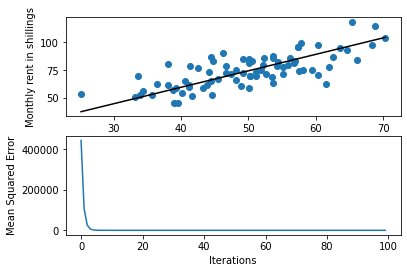

In [0]:
Y_hat = gradient_descent_fit(m, c, N_train, L)
displayScatter(Y_hat)

# Question A: L2 regularization



![alt text](https://drive.google.com/uc?id=1IFrwcvppiowLxPwPpp8es7MQIKspsiBZ)

In [0]:
def l2_mse(N, Y, Y_hat, m):
  return (1/N)* sum(Y - Y_hat)**2 + (1.5 * (m**2))

In [0]:
def l2_regularization(m, c, N, L):
  m = 0
  for i in range(epoch):
    Y_hat = m*X_train + c
    epoch_count_list.append(i)
    epoch_error = l2_mse(N, Y_train, Y_hat, m)
    epoch_error_list.append(epoch_error)
    # print(m)
    #minimizing error function using partial derivatives
    D_m = (-2/N) * sum(X_train * (Y_train - Y_hat)) + (1.5 * (2 * m))
    D_c = (-2/N) * sum(Y_train - Y_hat) + (1.5 * (2 * m))
    m = m - (L * D_m)
    c = c - (L * D_c)
  print("Final m is: ",m," and final c is: ",c)
  return Y_hat

Final m is:  1.4863692171819123  and final c is:  -0.003714596153900915


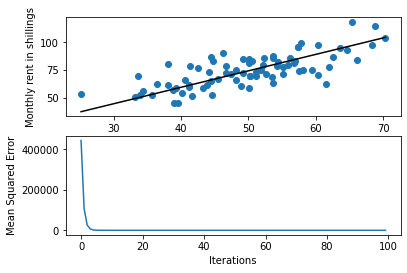

In [0]:
Y_hat = l2_regularization(m, c, N_train, L)
displayScatter(Y_hat)

# Question B: L1 Regularization



![alt text](https://drive.google.com/uc?id=1I2aZJ7-bt_ND-JAtKdV5lijf8nWz5W-1)

In [0]:
def l1_mse(N, Y, Y_hat, m):
  return (1/N)* sum(Y - Y_hat)**2 + (1.5 * abs(m))

In [0]:
def l1_regularization(m, c, N, L):
  m = -0.1
  for i in range(epoch):
    Y_hat = m*X_train + c
    epoch_count_list.append(i)
    epoch_error = l1_mse(N, Y_train, Y_hat, m)
    epoch_error_list.append(epoch_error)
    #minimizing error function using partial derivatives
    D_m = (-2/N) * sum(X_train * (Y_train - Y_hat)) + (1.5 * (m / abs(m)))
    D_c = (-2/N) * sum(Y_train - Y_hat) + (1.5 * (m / abs(m)))
    m = m - (L * D_m)
    c = c - (L * D_c)
  print("Final m is: ",m," and final c is: ",c)
  return Y_hat

An error was encountered in the first epoch, where there was division by 0 in variable m.
This can be solved by initializing m to a value not equal to zero.



Final m is:  1.4863329703466968  and final c is:  0.024605641060263566


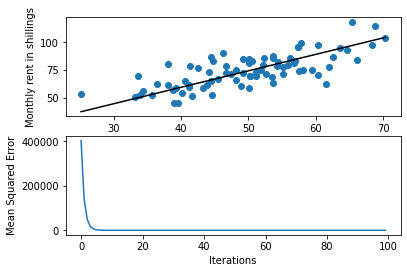

In [0]:
Y_hat = l1_regularization(m, c, N, L)
displayScatter(Y_hat)